# Find candidate WDs from SSS within the DES footprint...

In [184]:
# See, e.g., http://matplotlib.1069221.n5.nabble.com/how-to-tell-if-a-point-is-inside-a-polygon-td17339.html

In [185]:
import csv
import math
import numpy as np
import pandas as pd
from matplotlib import path
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
import astropy.units as u

In [186]:
# Read in Goodman_ETC_SN30.csv...
# Note that these are total exposure time estimates for the Goodman spectrograph on the SOAR-4m telescope.
# On Magellan, we should get (very roughly) the same S/N (=30) at (4.0m/6.5m)**2 = 1/2.64 the time.
# That said, we got great spectra from Magellan using the exposure times used last year!
etcDataDF = pd.read_csv('../data/Goodman_ETC_SN30.csv')
etcDataDF.head(10)

r  exptime
0  14.5     46.0
1  14.6     51.0
2  14.7     56.0
3  14.8     61.0
4  14.9     67.0
5  15.0     73.0
6  15.1     80.0
7  15.2     88.0
8  15.3     96.0
9  15.4    106.0

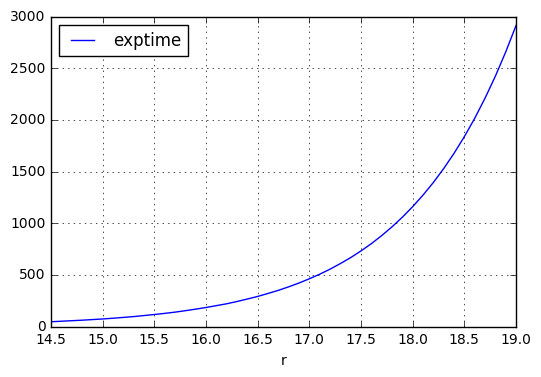

In [187]:
# Plot etcDataDF...
etcDataDF.plot('r','exptime',grid=True)

In [188]:
# Read in round13-poly.csv file...
polygonDataDF = pd.read_csv('../data/round13-poly.csv')
polygonDataDF.head(10)

radeg  decdeg
0   23.0    -7.0
1   22.0    -7.0
2   21.0    -7.0
3   20.0    -7.0
4   19.0    -7.0
5   18.0    -7.0
6   17.0    -7.0
7   16.0    -7.0
8   15.0    -7.0
9   14.0    -7.0

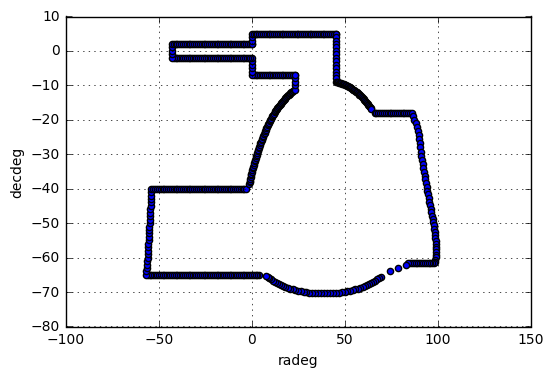

In [189]:
# Plot polygonDataDF...
polygonDataDF.plot('radeg','decdeg', kind='scatter', grid=True)

In [190]:
# Create vertices from polygonDataDF...
verts = polygonDataDF.values.tolist()
verts[:10]

[[23.0, -7.0],
 [22.0, -7.0],
 [21.0, -7.0],
 [20.0, -7.0],
 [19.0, -7.0],
 [18.0, -7.0],
 [17.0, -7.0],
 [16.0, -7.0],
 [15.0, -7.0],
 [14.0, -7.0]]

In [191]:
# Creating Path from vertices...
polygonPath = path.Path(verts)

In [192]:
# Read in ssawdcat.dat.csv file...
ssawdDataDF = pd.read_csv('../data/ssawdcat.dat.csv')
ssawdDataDF.head(10)

Name      ra      dec     epoch  mu_acosd   mu_d       b  \
0  SSSJ000022.5-105142  0.0937 -10.8616  1987.631      46.0  -23.0  19.093   
1  SSSJ000034.0-052922  0.1415  -5.4895  1989.894      88.4  -16.2  17.133   
2  SSSJ000053.1-465220  0.2214 -46.8722  1991.348      55.3  -26.9  18.725   
3  SSSJ000115.7+401037  0.3154  40.1769  1989.761     100.5  -50.6  19.242   
4  SSSJ000122.3+183255  0.3428  18.5485  1989.241      73.3  -29.6  18.319   
5  SSSJ000123.3-111156  0.3469 -11.1988  1999.610      92.3 -115.6  18.763   
6  SSSJ000136.1-374710  0.4005 -37.7860  1996.867      94.3  -11.6  18.222   
7  SSSJ000137.6+323655  0.4065  32.6152  1989.828     -75.7  -74.5  17.554   
8  SSSJ000154.8+452034  0.4784  45.3427  1989.678     236.1  -31.1  18.270   
9  SSSJ000156.3-561722  0.4844 -56.2895  1996.836     -86.7  -34.9  18.604   

        r       i    d_H   vt_H  Mbol_H  w_H   d_He  vt_He  Mbol_He  w_He  
0  18.688  18.536  150.8   36.8    12.8  1.0  150.3   36.6     12.8   0.0  
1  17.062  17.062  121.2   51.7    10.9  1.0  114.4   48.8     11.1   0.0  
2  17.989  17.787   77.2   22.5    13.8  1.0   77.7   22.7     13.8   0.0  
3  18.884  19.027  228.8  122.5    11.9  1.0  214.2  114.7     12.0   0.0  
4  18.181  18.106  178.7   66.9    11.5  1.0  166.6   62.4     11.7   0.0  
5  18.086  17.941   88.2   61.8    13.6  1.0   88.8   62.3     13.6   0.0  
6  18.165  17.845  153.5   69.1    11.8  1.0  144.8   65.2     11.9   0.0  
7  17.644  17.581  174.3   87.6    10.1  1.0  170.5   85.7     10.4   0.0  
8  17.755  17.510   80.9   91.3    13.3  1.0   81.3   91.8     13.3   0.0  
9  18.250  17.943  113.3   49.9    12.9  1.0  113.2   49.9     13.0   0.0

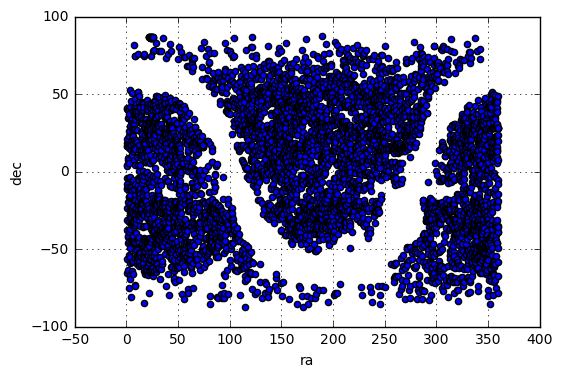

In [193]:
# Plot ssawDataDF (for candidate WDs with rmag > 18.0)...
ssawdDataDF[(ssawdDataDF.r>18.0)].plot('ra','dec',kind='scatter', grid=True)

In [199]:
# The radeg, decdeg coords from the ssawdcat.csv file are not sufficiently precise,
# so we will grab these values by converting from the more precise RAHMS,DECDMS values
# from the object name...
HH = ssawdDataDF['Name'].str[4:6]
MM = ssawdDataDF['Name'].str[6:8]
SS = ssawdDataDF['Name'].str[8:12]
ssawdDataDF['raHMS'] = HH.str.cat([MM,SS],sep=':')

DD = ssawdDataDF['Name'].str[12:15]
MM = ssawdDataDF['Name'].str[15:17]
SS = ssawdDataDF['Name'].str[17:19]
ssawdDataDF['decDMS'] = DD.str.cat([MM,SS],sep=':')

# This is a little slow, but not too hideously slow (maybe see how to speed it up later)...
# (Note, we also do the ra wrap at 180degrees here)
# See http://www.astropy.org/astropy-tutorials/plot-catalog.html
ssawdDataDF['radeg'] = coord.Angle(ssawdDataDF['raHMS'], unit=u.hour).wrap_at(180*u.degree).degree
ssawdDataDF['decdeg'] = coord.Angle(ssawdDataDF['decDMS'], unit=u.degree).degree

ssawdDataDF.head(10)

Name      ra      dec     epoch  mu_acosd   mu_d       b  \
0  SSSJ000022.5-105142  0.0937 -10.8616  1987.631      46.0  -23.0  19.093   
1  SSSJ000034.0-052922  0.1415  -5.4895  1989.894      88.4  -16.2  17.133   
2  SSSJ000053.1-465220  0.2214 -46.8722  1991.348      55.3  -26.9  18.725   
3  SSSJ000115.7+401037  0.3154  40.1769  1989.761     100.5  -50.6  19.242   
4  SSSJ000122.3+183255  0.3428  18.5485  1989.241      73.3  -29.6  18.319   
5  SSSJ000123.3-111156  0.3469 -11.1988  1999.610      92.3 -115.6  18.763   
6  SSSJ000136.1-374710  0.4005 -37.7860  1996.867      94.3  -11.6  18.222   
7  SSSJ000137.6+323655  0.4065  32.6152  1989.828     -75.7  -74.5  17.554   
8  SSSJ000154.8+452034  0.4784  45.3427  1989.678     236.1  -31.1  18.270   
9  SSSJ000156.3-561722  0.4844 -56.2895  1996.836     -86.7  -34.9  18.604   

        r       i    d_H    ...      Mbol_H  w_H   d_He  vt_He  Mbol_He  w_He  \
0  18.688  18.536  150.8    ...        12.8  1.0  150.3   36.6     12.8   0.0   
1  17.062  17.062  121.2    ...        10.9  1.0  114.4   48.8     11.1   0.0   
2  17.989  17.787   77.2    ...        13.8  1.0   77.7   22.7     13.8   0.0   
3  18.884  19.027  228.8    ...        11.9  1.0  214.2  114.7     12.0   0.0   
4  18.181  18.106  178.7    ...        11.5  1.0  166.6   62.4     11.7   0.0   
5  18.086  17.941   88.2    ...        13.6  1.0   88.8   62.3     13.6   0.0   
6  18.165  17.845  153.5    ...        11.8  1.0  144.8   65.2     11.9   0.0   
7  17.644  17.581  174.3    ...        10.1  1.0  170.5   85.7     10.4   0.0   
8  17.755  17.510   80.9    ...        13.3  1.0   81.3   91.8     13.3   0.0   
9  18.250  17.943  113.3    ...        12.9  1.0  113.2   49.9     13.0   0.0   

        raHMS     decDMS     radeg     decdeg  
0  00:00:22.5  -10:51:42  0.093750 -10.861667  
1  00:00:34.0  -05:29:22  0.141667  -5.489444  
2  00:00:53.1  -46:52:20  0.221250 -46.872222  
3  00:01:15.7  +40:10:37  0.315417  40.176944  
4  00:01:22.3  +18:32:55  0.342917  18.548611  
5  00:01:23.3  -11:11:56  0.347083 -11.198889  
6  00:01:36.1  -37:47:10  0.400417 -37.786111  
7  00:01:37.6  +32:36:55  0.406667  32.615278  
8  00:01:54.8  +45:20:34  0.478333  45.342778  
9  00:01:56.3  -56:17:22  0.484583 -56.289444  

[10 rows x 21 columns]

In [200]:
# Check to make sure ra wrap at 180deg worked...
ssawdDataDF[(ssawdDataDF.ra>179.9)].head(10)

Name        ra      dec     epoch  mu_acosd   mu_d  \
5000  SSSJ115939.6+353806  179.9151  35.6349  1989.043    -228.0 -165.1   
5001  SSSJ115943.6-500818  179.9315 -50.1384  1983.276     -30.9  -21.8   
5002  SSSJ115948.6+070708  179.9524   7.1189  1998.333    -170.3  103.9   
5003  SSSJ115951.9-225449  179.9661 -22.9137  1996.158     -98.9  -34.0   
5004  SSSJ115954.1+315052  179.9753  31.8477  1992.052     -54.4    5.0   
5005  SSSJ115958.3+465526  179.9928  46.9238  1996.212     -90.9  -17.7   
5006  SSSJ115959.0+404542  179.9957  40.7618  1989.431      -7.6  -55.4   
5007  SSSJ120001.8-183740  180.0077 -18.6279  1996.158    -154.2  -44.3   
5008  SSSJ120003.5+433542  180.0145  43.5950  1996.212    -298.5  -30.9   
5009  SSSJ120015.8-062052  180.0660  -6.3477  1996.231    -134.3   -0.1   

           b       r       i    d_H    ...      Mbol_H   w_H   d_He  vt_He  \
5000  17.961  17.368  17.246   69.5    ...        13.3  1.00   70.0   93.2   
5001  17.323  17.531  17.627  229.8    ...         8.4  1.00  248.1   44.4   
5002  17.989  17.692  17.792  140.4    ...        11.7  1.00  130.6  123.2   
5003  17.728  17.604  17.810  174.3    ...        10.5  1.00  166.7   83.0   
5004  18.286  18.078  18.277  198.1    ...        11.0  1.00  185.9   48.2   
5005  18.827  18.585  18.948  273.2    ...        10.6  1.00  261.0  115.1   
5006  18.995  18.636  18.349  137.4    ...        12.9  1.00  137.4   36.5   
5007  18.972  18.087  17.893   71.9    ...        14.1  0.61   73.3   55.6   
5008  16.224  15.775  15.534   34.7    ...        13.1  1.00   34.8   49.5   
5009  19.643  18.838  18.635  107.3    ...        13.9  0.63  108.4   68.9   

      Mbol_He  w_He       raHMS     decDMS       radeg     decdeg  
5000     13.4  0.00  11:59:39.6  +35:38:06  179.915000  35.635000  
5001      8.0  0.00  11:59:43.6  -50:08:18  179.931667 -50.138333  
5002     11.9  0.00  11:59:48.6  +07:07:08  179.952500   7.118889  
5003     10.8  0.00  11:59:51.9  -22:54:49  179.966250 -22.913611  
5004     11.2  0.00  11:59:54.1  +31:50:52  179.975417  31.847778  
5005     10.9  0.00  11:59:58.3  +46:55:26  179.992917  46.923889  
5006     12.9  0.00  11:59:59.0  +40:45:42  179.995833  40.761667  
5007     14.1  0.39  12:00:01.8  -18:37:40 -179.992500 -18.627778  
5008     13.1  0.00  12:00:03.5  +43:35:42 -179.985417  43.595000  
5009     14.0  0.37  12:00:15.8  -06:20:52 -179.934167  -6.347778  

[10 rows x 21 columns]

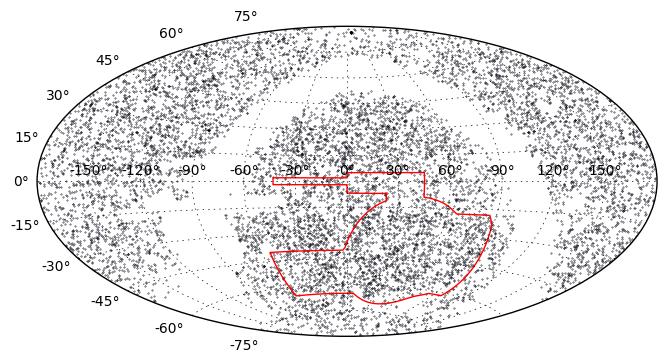

In [226]:
# Plot distribution of WDs on sky...

# WD coordinates...
ra = coord.Angle(ssawdDataDF['radeg'], unit=u.degree)
dec = coord.Angle(ssawdDataDF['decdeg'], unit=u.degree)

# DES footprint coordinates...
ra_des = coord.Angle(polygonDataDF['radeg'], unit=u.degree)
dec_des = coord.Angle(polygonDataDF['decdeg'], unit=u.degree)

# Plot...
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection="mollweide")
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(ra.radian, dec.radian, s=0.1)       # WD points...
plt.plot(ra_des.radian, dec_des.radian, 'r-')  # DES footprint outline...
plt.grid(True)

In [241]:
# Create mask that contains only those WDs within the DES footprint...
mask = polygonPath.contains_points(ssawdDataDF[['radeg','decdeg']])

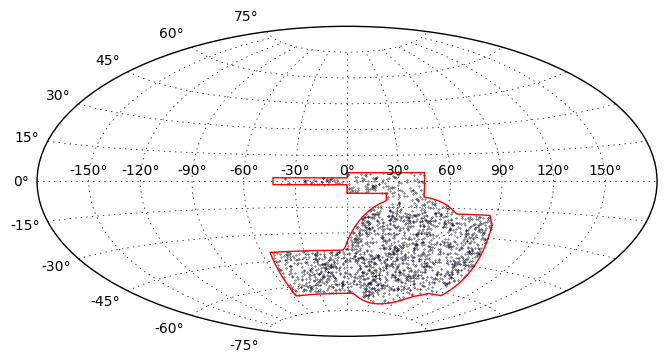

In [242]:
# Plot distribution of WDs on sky, but now only those within the DES footprint...

# WD coordinates...
ra = coord.Angle(ssawdDataDF[mask].radeg, unit=u.degree)
dec = coord.Angle(ssawdDataDF[mask].decdeg, unit=u.degree)

# DES footprint coordinates...
ra_des = coord.Angle(polygonDataDF['radeg'], unit=u.degree)
dec_des = coord.Angle(polygonDataDF['decdeg'], unit=u.degree)

# Plot...
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection="mollweide")
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter(ra.radian, dec.radian, s=0.1)       # WD points...
plt.plot(ra_des.radian, dec_des.radian, 'r-')  # DES footprint outline...
plt.grid(True)

In [253]:
# Create a mask that contains only those WDs 
#  1. within the DES footprint, 
#  2. in the mag range 18.0 <= r < 19.0
#  3. in the color range b-r < 0.1 and r-i < 0.1 (i.e., "blue")...
mask1 = polygonPath.contains_points(ssawdDataDF[['radeg','decdeg']])
mask2 = ( (ssawdDataDF['r'] >= 18.0) & (ssawdDataDF['r'] < 19.0) )
mask3 = ( (ssawdDataDF['b']-ssawdDataDF['r'] < 0.1) & (ssawdDataDF['r']-ssawdDataDF['i'] < 0.1) )
mask = mask1 & mask2  & mask3

# How many objects do we have left?
ssawdDataDF[mask].radeg.size

72

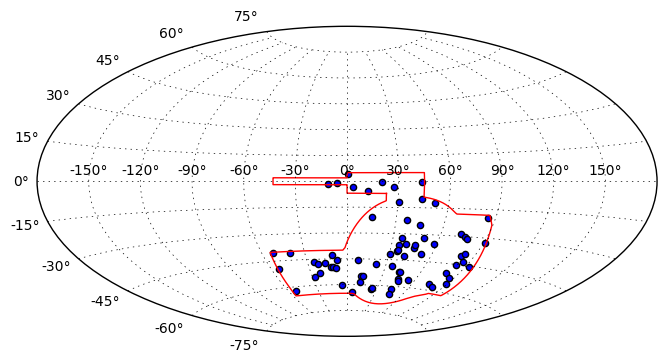

In [249]:
# Plot distribution of WDs on sky, but now only those that meet the above criteria
#  (within DES footprint, in mag range r=18.0-19.0, and "blue"...

# WD coordinates...
ra = coord.Angle(ssawdDataDF[mask].radeg, unit=u.degree)
dec = coord.Angle(ssawdDataDF[mask].decdeg, unit=u.degree)

# DES footprint coordinates...
ra_des = coord.Angle(polygonDataDF['radeg'], unit=u.degree)
dec_des = coord.Angle(polygonDataDF['decdeg'], unit=u.degree)

# Plot...
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection="mollweide")
ax = fig.add_subplot(111, projection="aitoff")
#ax.scatter(ra.radian, dec.radian, s=4)       # WD points...
ax.scatter(ra.radian, dec.radian)       # WD points...
plt.plot(ra_des.radian, dec_des.radian, 'r-')  # DES footprint outline...
plt.grid(True)

In [250]:
ssawdDataDF[mask]

Name        ra      dec     epoch  mu_acosd   mu_d  \
17    SSSJ000247.0+042859    0.6958   4.4830  1989.219     -51.5    3.8   
139   SSSJ001449.4-032109    3.7060  -3.3524  1984.747       8.1  -61.4   
175   SSSJ002024.8-635912    5.1032 -63.9867  1990.414      54.2  -26.8   
289   SSSJ003301.8-454335    8.2577 -45.7265  1989.048      23.6  -62.7   
402   SSSJ004657.5-544105   11.7394 -54.6847  1997.610      92.3  -19.8   
424   SSSJ004847.8-052042   12.1992  -5.3449  1984.357      49.4  -41.7   
430   SSSJ004914.0-582003   12.3083 -58.3341  1986.602      48.0  -28.0   
489   SSSJ005510.1-545349   13.7920 -54.8969  1988.236      56.8    9.3   
529   SSSJ010050.3-203651   15.2095 -20.6141  1989.618      53.0   11.4   
712   SSSJ012102.4-002811   20.2599  -0.4696  1991.753     -99.2 -108.6   
765   SSSJ012744.4-475709   21.9350 -47.9526  1996.774      85.6   34.2   
871   SSSJ013643.5-621253   24.1811 -62.2147  1993.850      83.3   -4.1   
924   SSSJ014151.7-614049   25.4653 -61.6802  1999.634      81.2   25.0   
1004  SSSJ014917.7-032553   27.3238  -3.4314  1983.623      47.1  -21.7   
1122  SSSJ020306.2-114232   30.7758 -11.7088  1991.703      78.3  -17.3   
1126  SSSJ020405.5-415817   31.0231 -41.9713  1988.341      35.1   43.9   
1241  SSSJ021918.8-361704   34.8282 -36.2844  1988.942      55.8  -53.6   
1251  SSSJ022023.5-401205   35.0980 -40.2013  1989.952      63.4   -6.1   
1254  SSSJ022041.3-482109   35.1721 -48.3526  1997.817      75.5   67.4   
1261  SSSJ022232.4-393704   35.6349 -39.6178  1989.457      70.3   11.9   
1266  SSSJ022329.0-324224   35.8710 -32.7067  1988.931      51.1    9.6   
1290  SSSJ022634.6-221420   36.6442 -22.2390  1996.800      34.5 -130.9   
1400  SSSJ023824.8-360224   39.6033 -36.0399  1985.365      60.4   15.7   
1441  SSSJ024456.2-423228   41.2343 -42.5411  1985.945      22.7   51.8   
1478  SSSJ024854.3-514544   42.2262 -51.7622  1984.390     -74.0  -19.8   
1513  SSSJ025306.8-514300   43.2782 -51.7168  1983.146      53.4   30.7   
1514  SSSJ025325.8-002751   43.3574  -0.4643  1997.894      95.2   11.0   
1535  SSSJ025658.4-095324   44.2433  -9.8899  1986.115      38.0  -19.8   
1537  SSSJ025719.2-614032   44.3302 -61.6756  1983.243      10.4  -62.7   
1538  SSSJ025723.5-553028   44.3479 -55.5077  1986.103     -24.3  -47.4   
...                   ...       ...      ...       ...       ...    ...   
2357  SSSJ050509.7-301349   76.2905 -30.2304  1988.375      14.8   48.2   
2397  SSSJ051210.9-311259   78.0454 -31.2163  1984.744     -18.0  -46.9   
2435  SSSJ052026.2-575451   80.1092 -57.9141  1988.153       2.6   44.2   
2439  SSSJ052047.8-500508   80.1993 -50.0855  1984.951       7.1   36.0   
2464  SSSJ052424.0-401534   81.1001 -40.2595  1986.308      26.5   45.4   
2495  SSSJ052943.1-452548   82.4296 -45.4299  1986.755      23.3   45.3   
2505  SSSJ053056.3-385759   82.7347 -38.9665  1982.111      43.5   25.9   
2564  SSSJ054112.5-432508   85.3019 -43.4189  1986.616     -16.0  -36.2   
2565  SSSJ054114.7-193038   85.3113 -19.5105  1984.858      27.3  -26.1   
2576  SSSJ054318.2-521738   85.8258 -52.2939  1984.867      -8.4  -36.8   
2635  SSSJ055603.8-552731   89.0159 -55.4586  1984.566       3.9   45.1   
2667  SSSJ060421.3-322611   91.0889 -32.4364  1986.319      -8.2  -60.5   
2688  SSSJ060853.6-451534   92.2234 -45.2595  1984.073     -10.0   62.7   
8077  SSSJ202313.9-494310  305.8080 -49.7193  1986.023      16.4  -48.7   
8111  SSSJ202935.9-622435  307.3995 -62.4098  1991.672       5.9  -99.9   
8120  SSSJ203006.2-402950  307.5260 -40.4973  1993.409      22.9 -109.3   
8393  SSSJ211833.4-410959  319.6392 -41.1663  1991.763     -53.3  -84.3   
8775  SSSJ220744.3-545727  331.9346 -54.9575  1986.864      58.6   -5.0   
8884  SSSJ222035.9-464552  335.1496 -46.7644  1982.824      54.9  -19.8   
8985  SSSJ223114.3-524408  337.8096 -52.7355  1986.779      49.5  -12.0   
8991  SSSJ223133.1-475050  337.8878 -47.8474  1988.045      46.2  -21.2   
9178  SSSJ225230.1-470524  343.1254 -47.0900  

In [261]:
# Let's focus on the 60 that lie south of DEC=-20deg...
new_mask = mask & (ssawdDataDF.decdeg < -20.0)
ssawdDataDF[new_mask][['Name', 'raHMS', 'decDMS', 'r']]

Name       raHMS     decDMS       r
175   SSSJ002024.8-635912  00:20:24.8  -63:59:12  18.033
289   SSSJ003301.8-454335  00:33:01.8  -45:43:35  18.455
402   SSSJ004657.5-544105  00:46:57.5  -54:41:05  18.633
430   SSSJ004914.0-582003  00:49:14.0  -58:20:03  18.027
489   SSSJ005510.1-545349  00:55:10.1  -54:53:49  18.087
529   SSSJ010050.3-203651  01:00:50.3  -20:36:51  18.425
765   SSSJ012744.4-475709  01:27:44.4  -47:57:09  18.161
871   SSSJ013643.5-621253  01:36:43.5  -62:12:53  18.164
924   SSSJ014151.7-614049  01:41:51.7  -61:40:49  18.475
1126  SSSJ020405.5-415817  02:04:05.5  -41:58:17  18.768
1241  SSSJ021918.8-361704  02:19:18.8  -36:17:04  18.695
1251  SSSJ022023.5-401205  02:20:23.5  -40:12:05  18.114
1254  SSSJ022041.3-482109  02:20:41.3  -48:21:09  18.103
1261  SSSJ022232.4-393704  02:22:32.4  -39:37:04  18.170
1266  SSSJ022329.0-324224  02:23:29.0  -32:42:24  18.541
1290  SSSJ022634.6-221420  02:26:34.6  -22:14:20  18.576
1400  SSSJ023824.8-360224  02:38:24.8  -36:02:24  18.411
1441  SSSJ024456.2-423228  02:44:56.2  -42:32:28  18.358
1478  SSSJ024854.3-514544  02:48:54.3  -51:45:44  18.108
1513  SSSJ025306.8-514300  02:53:06.8  -51:43:00  18.710
1537  SSSJ025719.2-614032  02:57:19.2  -61:40:32  18.133
1538  SSSJ025723.5-553028  02:57:23.5  -55:30:28  18.363
1569  SSSJ030158.3-245043  03:01:58.3  -24:50:43  18.469
1572  SSSJ030241.2-380539  03:02:41.2  -38:05:39  18.338
1590  SSSJ030341.6-565259  03:03:41.6  -56:52:59  18.166
1595  SSSJ030410.0-362302  03:04:10.0  -36:23:02  18.296
1601  SSSJ030446.5-642629  03:04:46.5  -64:26:29  18.112
1711  SSSJ031926.7-315432  03:19:26.7  -31:54:32  18.284
1799  SSSJ032901.9-404417  03:29:01.9  -40:44:17  18.392
1856  SSSJ033737.6-555256  03:37:37.6  -55:52:56  18.464
1943  SSSJ035123.9-344549  03:51:23.9  -34:45:49  18.149
2286  SSSJ045030.9-284602  04:50:30.9  -28:46:02  18.045
2322  SSSJ045822.8-563734  04:58:22.8  -56:37:34  18.028
2357  SSSJ050509.7-301349  05:05:09.7  -30:13:49  18.140
2397  SSSJ051210.9-311259  05:12:10.9  -31:12:59  18.957
2435  SSSJ052026.2-575451  05:20:26.2  -57:54:51  18.253
2439  SSSJ052047.8-500508  05:20:47.8  -50:05:08  18.002
2464  SSSJ052424.0-401534  05:24:24.0  -40:15:34  18.373
2495  SSSJ052943.1-452548  05:29:43.1  -45:25:48  18.071
2505  SSSJ053056.3-385759  05:30:56.3  -38:57:59  18.830
2564  SSSJ054112.5-432508  05:41:12.5  -43:25:08  18.273
2576  SSSJ054318.2-521738  05:43:18.2  -52:17:38  18.123
2635  SSSJ055603.8-552731  05:56:03.8  -55:27:31  18.251
2667  SSSJ060421.3-322611  06:04:21.3  -32:26:11  18.269
2688  SSSJ060853.6-451534  06:08:53.6  -45:15:34  18.114
8077  SSSJ202313.9-494310  20:23:13.9  -49:43:10  18.193
8111  SSSJ202935.9-622435  20:29:35.9  -62:24:35  18.579
8120  SSSJ203006.2-402950  20:30:06.2  -40:29:50  18.185
8393  SSSJ211833.4-410959  21:18:33.4  -41:09:59  18.323
8775  SSSJ220744.3-545727  22:07:44.3  -54:57:27  18.406
8884  SSSJ222035.9-464552  22:20:35.9  -46:45:52  18.755
8985  SSSJ223114.3-524408  22:31:14.3  -52:44:08  18.895
8991  SSSJ223133.1-475050  22:31:33.1  -47:50:50  18.108
9178  SSSJ225230.1-470524  22:52:30.1  -47:05:24  18.310
9318  SSSJ231016.1-494247  23:10:16.1  -49:42:47  18.708
9360  SSSJ231510.5-493446  23:15:10.5  -49:34:46  18.243
9362  SSSJ231522.4-423857  23:15:22.4  -42:38:57  18.417
9464  SSSJ232602.6-502031  23:26:02.6  -50:20:31  18.739
9484  SSSJ232906.0-453514  23:29:06.0  -45:35:14  18.245
9562  SSSJ233945.0-595853  23:39:45.0  -59:58:53  18.252

In [272]:
# Same as above table, but in a format that is easier to cut-and-paste...
print ssawdDataDF[new_mask][['Name', 'raHMS', 'decDMS', 'r']]

                     Name       raHMS     decDMS       r
175   SSSJ002024.8-635912  00:20:24.8  -63:59:12  18.033
289   SSSJ003301.8-454335  00:33:01.8  -45:43:35  18.455
402   SSSJ004657.5-544105  00:46:57.5  -54:41:05  18.633
430   SSSJ004914.0-582003  00:49:14.0  -58:20:03  18.027
489   SSSJ005510.1-545349  00:55:10.1  -54:53:49  18.087
529   SSSJ010050.3-203651  01:00:50.3  -20:36:51  18.425
765   SSSJ012744.4-475709  01:27:44.4  -47:57:09  18.161
871   SSSJ013643.5-621253  01:36:43.5  -62:12:53  18.164
924   SSSJ014151.7-614049  01:41:51.7  -61:40:49  18.475
1126  SSSJ020405.5-415817  02:04:05.5  -41:58:17  18.768
1241  SSSJ021918.8-361704  02:19:18.8  -36:17:04  18.695
1251  SSSJ022023.5-401205  02:20:23.5  -40:12:05  18.114
1254  SSSJ022041.3-482109  02:20:41.3  -48:21:09  18.103
1261  SSSJ022232.4-393704  02:22:32.4  -39:37:04  18.170
1266  SSSJ022329.0-324224  02:23:29.0  -32:42:24  18.541
1290  SSSJ022634.6-221420  02:26:34.6  -22:14:20  18.576
1400  SSSJ023824.8-360224  02:3

In [ ]:
#See http://stackoverflow.com/questions/33651668/how-to-add-leading-zero-formatting-to-string-in-pandas
#np.round(ssawdDataDF['Name'].str[8:12].astype(np.float), 0).astype(np.int).astype(np.str).str.zfill(2)
#np.round(ssawdDataDF['Name'].str[8:12].astype(np.float), 0).astype(np.int).astype(np.str)
#print ssawdDataDF['Name'].str[8:12].astype(np.float).head(25)
#print ssawdDataDF['Name'].str[8:12].astype(np.float).astype(np.str).str.zfill(4).head(25)